Import the necessary libraries.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



Load the customer_value_analysis.csv into the variable customer_df.


In [60]:
customer_df=pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

First look at its main features (head, shape, info).

In [61]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [62]:
def r_cols(df):
    cols={}
    for i in df.columns:
        cols[i]=i.replace(' ','_').lower()
    return cols

customer_df=customer_df.rename(columns=r_cols(customer_df))

Change the type of effective_to_date column to DateTime format.

In [63]:
customer_df['effective_to_date']=customer_df['effective_to_date'].apply(lambda x: dt.strptime(x,"%m/%d/%y"))

Check NaN values per column.

In [64]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [65]:
def splitNC(df):
    return df._get_numeric_data(), df.select_dtypes('object')

Drop any ID column.

In [66]:
customer_df.drop('customer',axis=1,inplace=True)

Get the correlation matrix for the numerical variables.



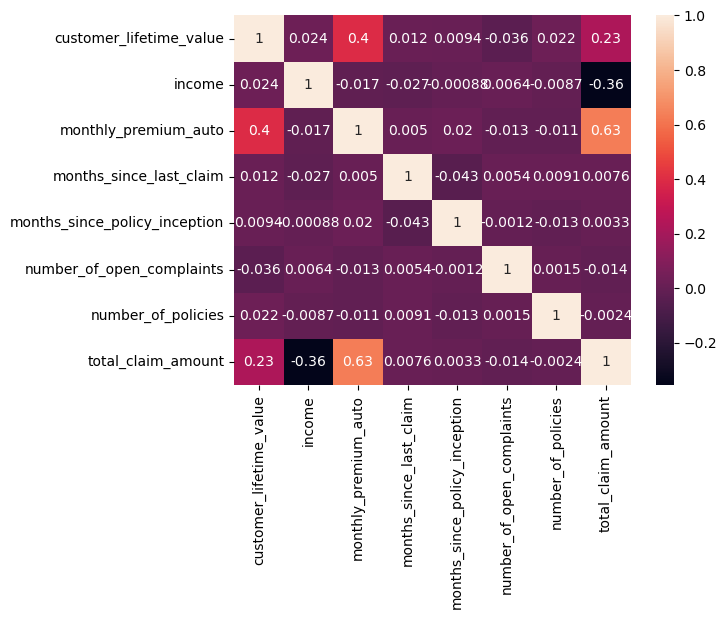

In [67]:
numerical_df,categorical_df=splitNC(customer_df)
sns.heatmap(data=numerical_df.corr(),annot=True);

 What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [68]:
print('The pair of numerical variables with highest correlation are',tuple(numerical_df.corr().replace(1,0).max().sort_values(ascending=False).index[:2]))

The pair of numerical variables with highest correlation are ('monthly_premium_auto', 'total_claim_amount')


Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.


In [69]:
def num_split(df,vals=36):
    x=[]
    y=[]
    for c in df.columns:
        if df[c].nunique()>vals:
            x.append(c)
        else:
            y.append(c)
    return df[x],df[y]

continuous_df,discrete_df=num_split(numerical_df)

Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).


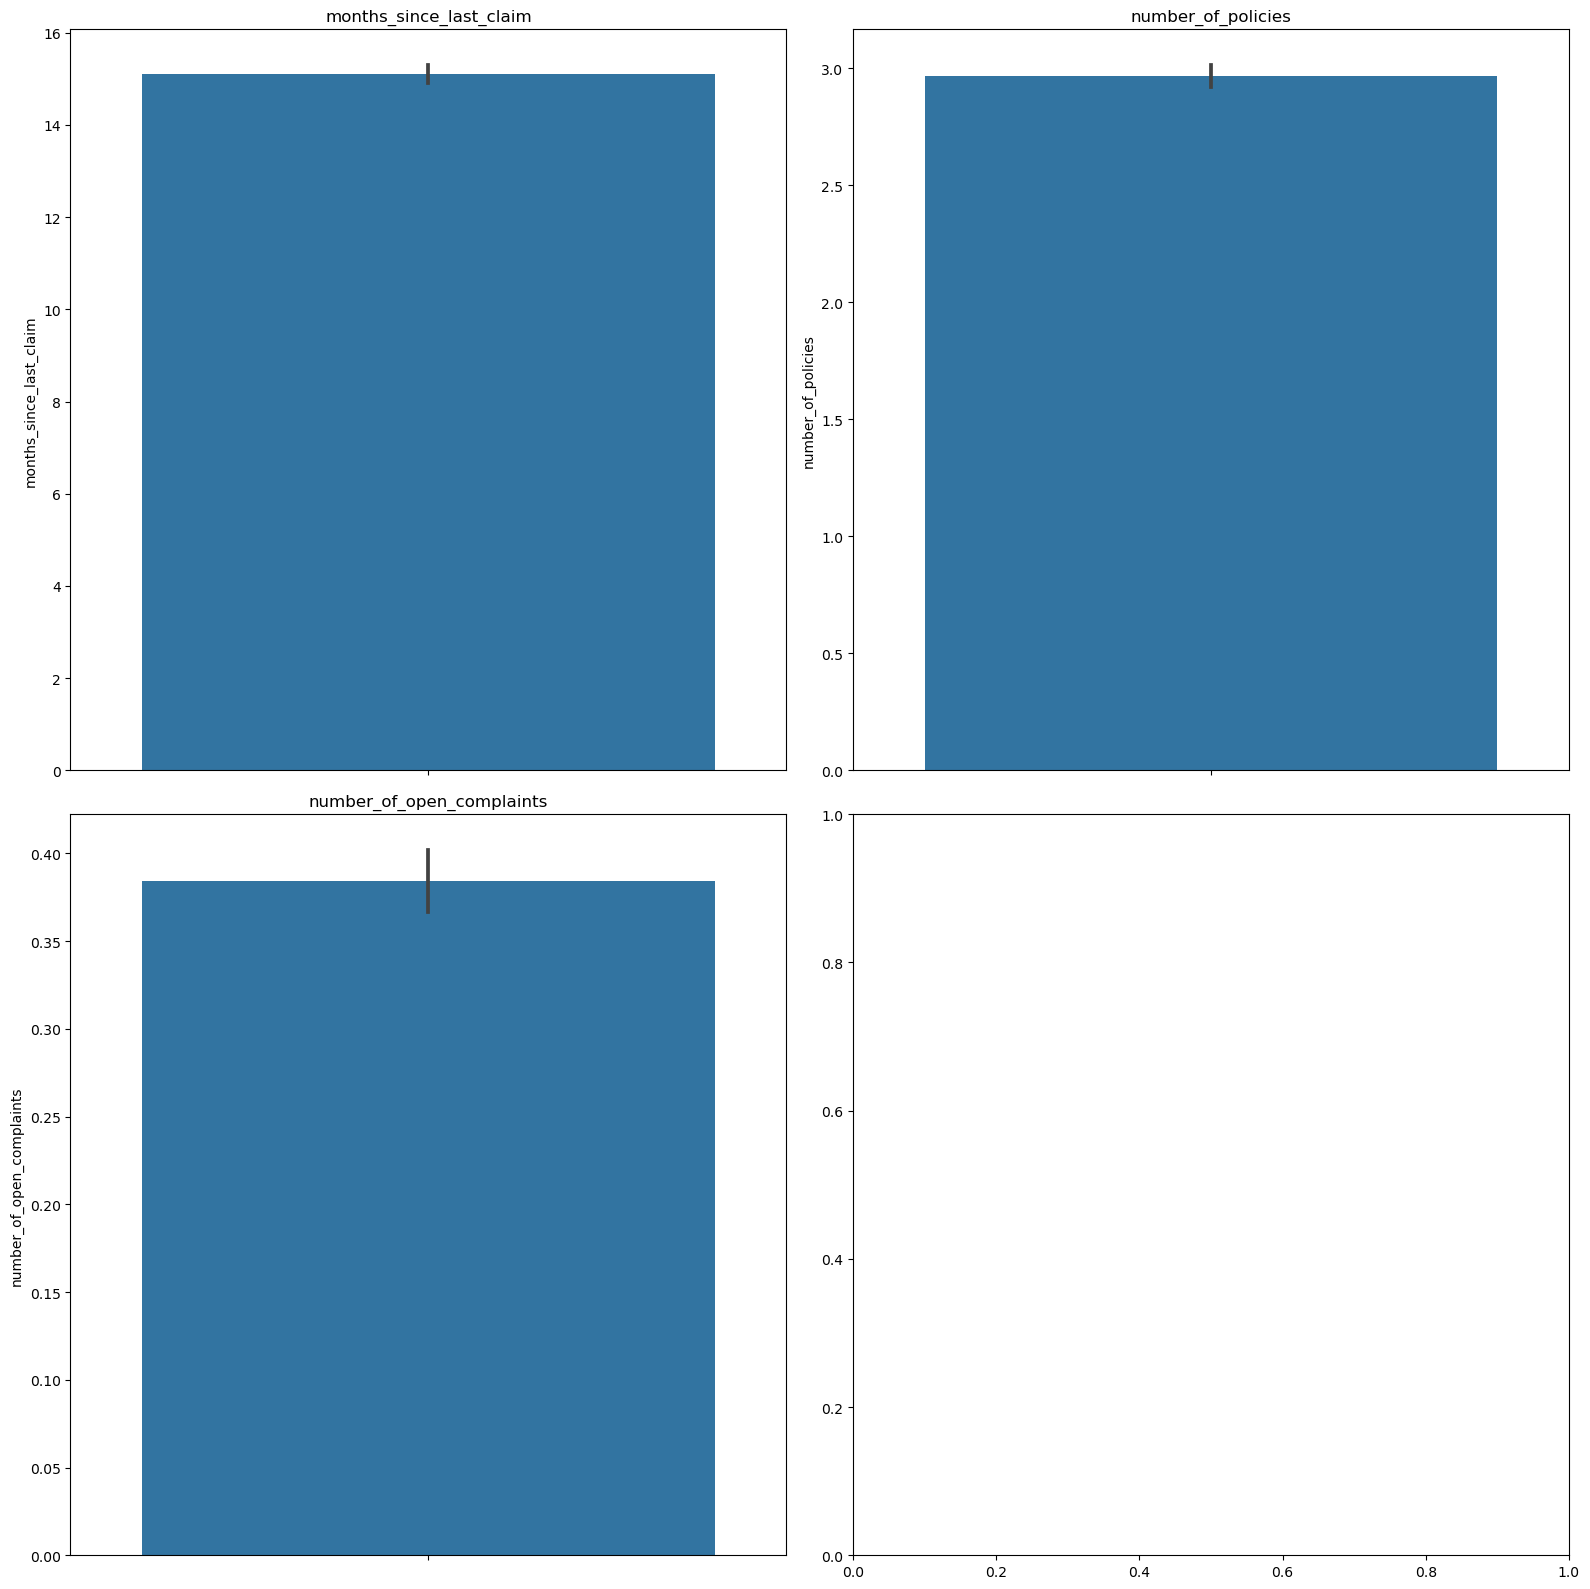

In [70]:
def barp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.barplot(y=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()
    

barp(discrete_df,16,16)


Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

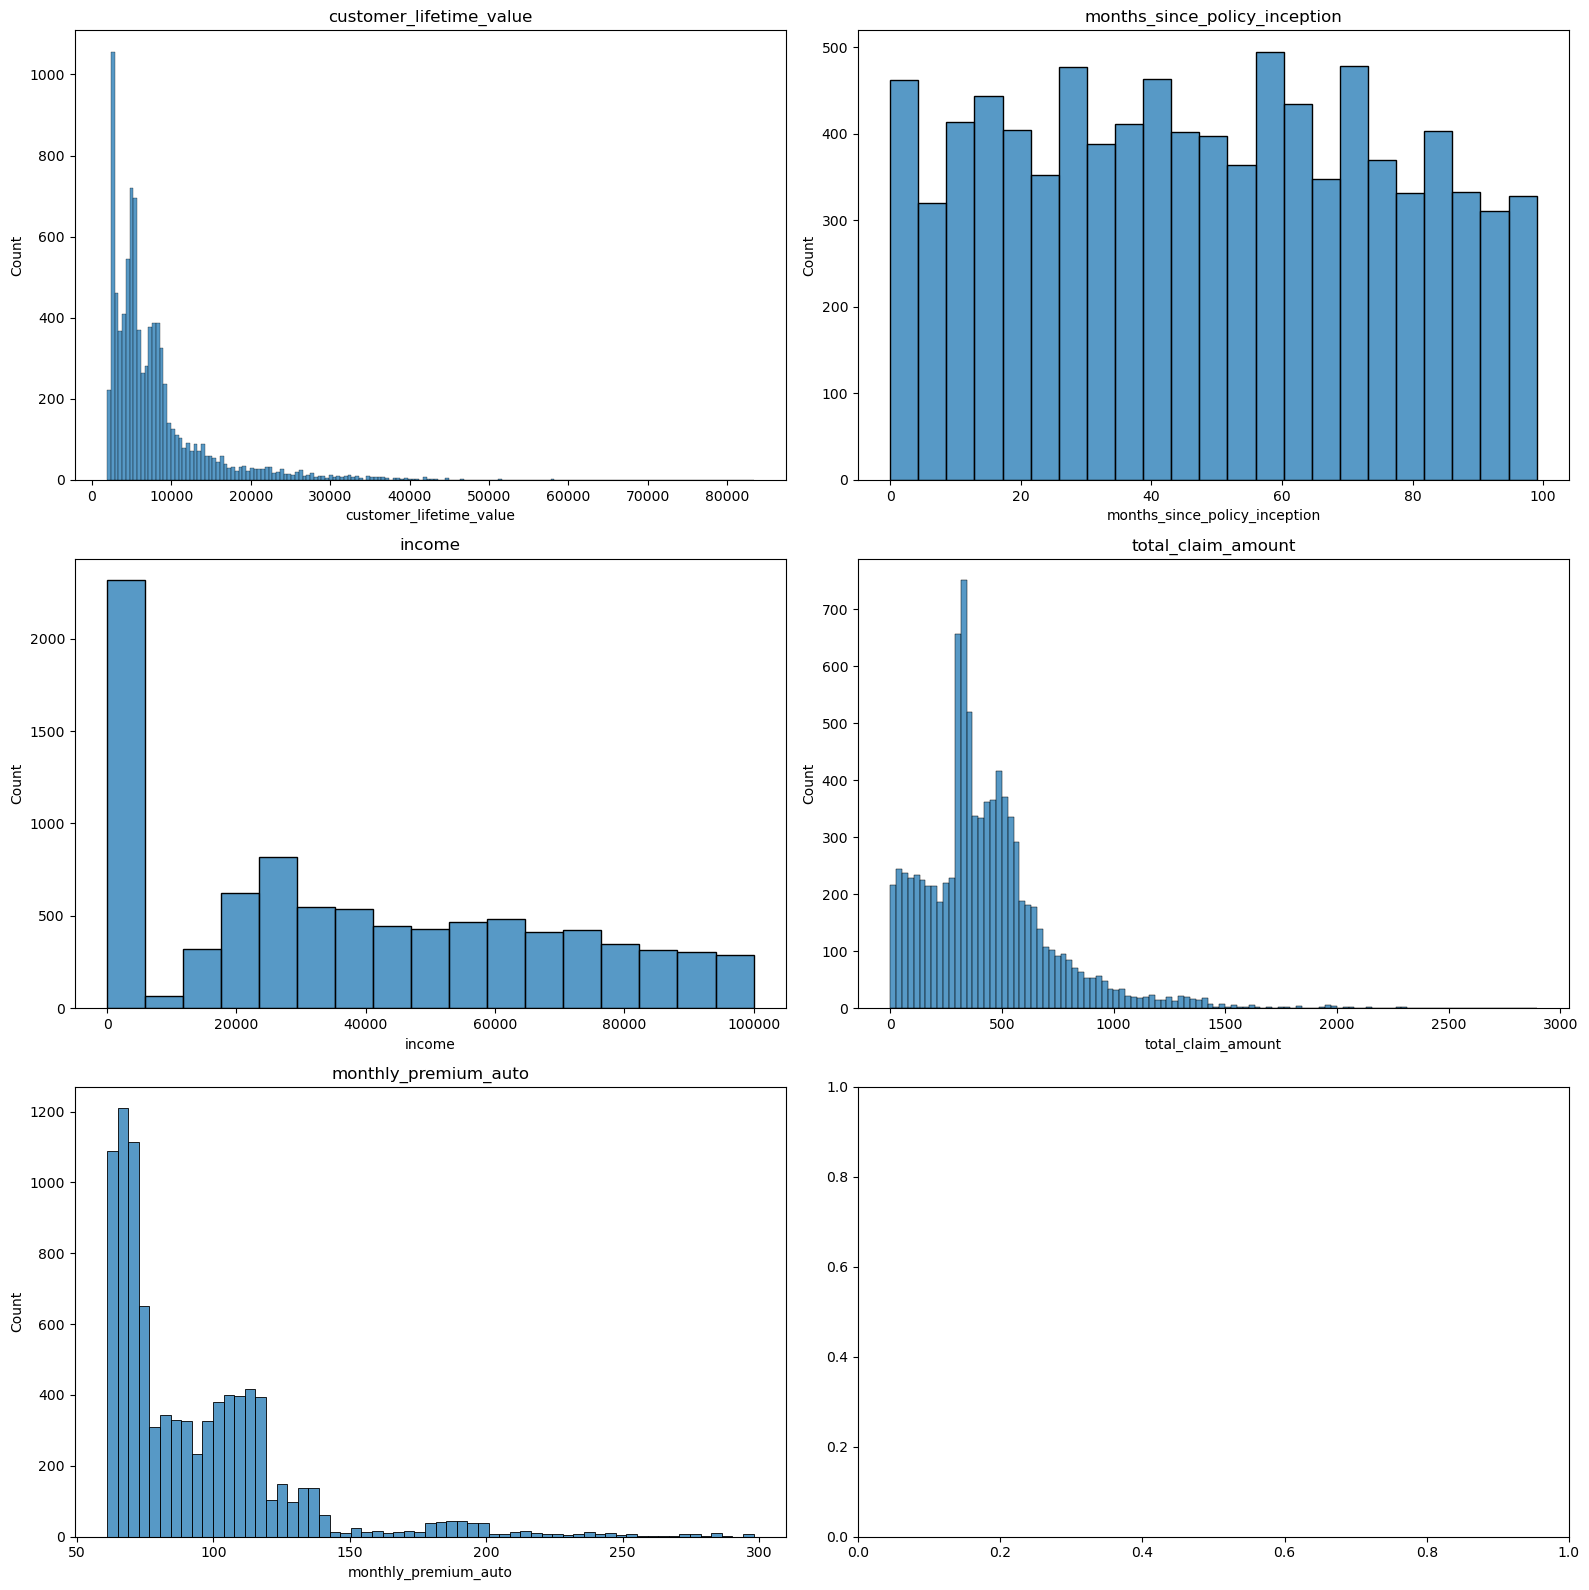

In [71]:

def histp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.histplot(x=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()
    

histp(continuous_df,16,16)

According to the previous histogram plots, do you think that you will have to apply any transformation?


Yes, applying transformations will be necessary because there is some skewdness to the left on most columns

Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

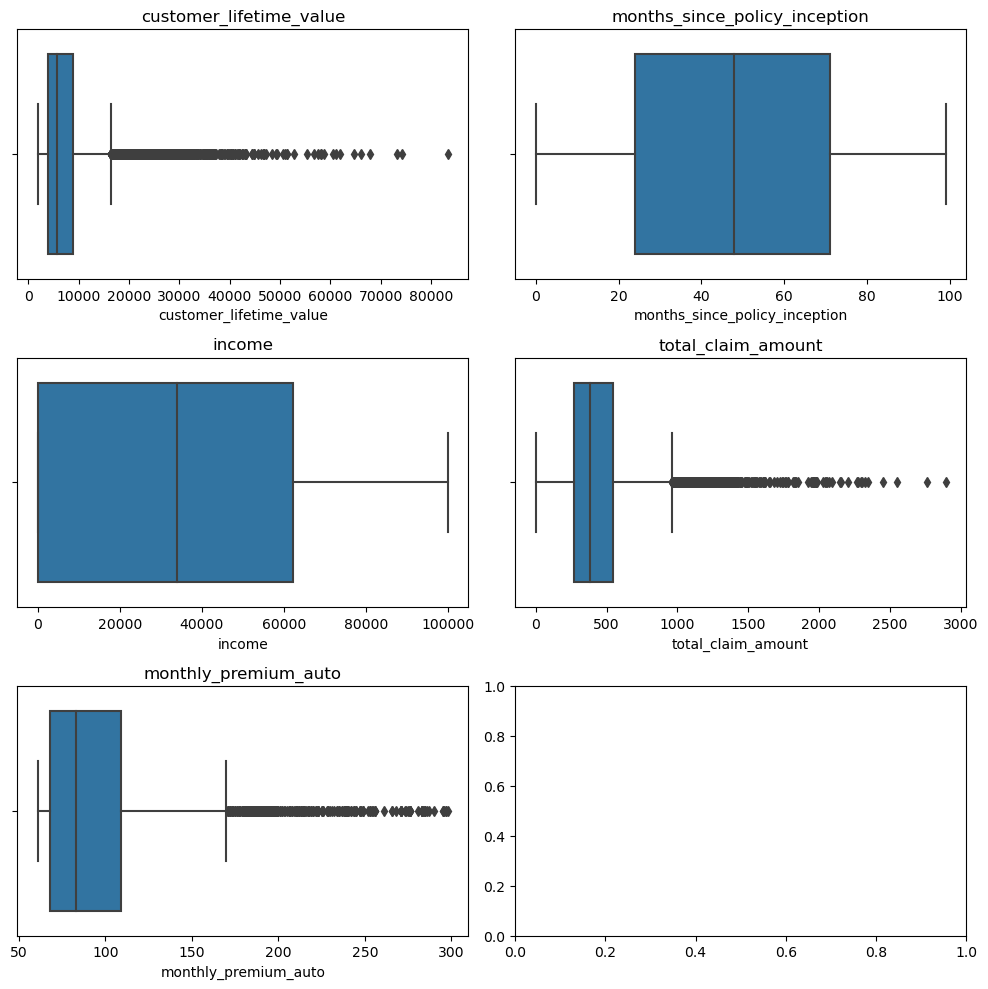

In [72]:
def boxp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            sx = sns.boxplot(x=df[df.columns[column_index]], ax=ax[i,c])
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()

boxp(continuous_df,10,10)

### Lab Cleaning Categorical Data.



Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.


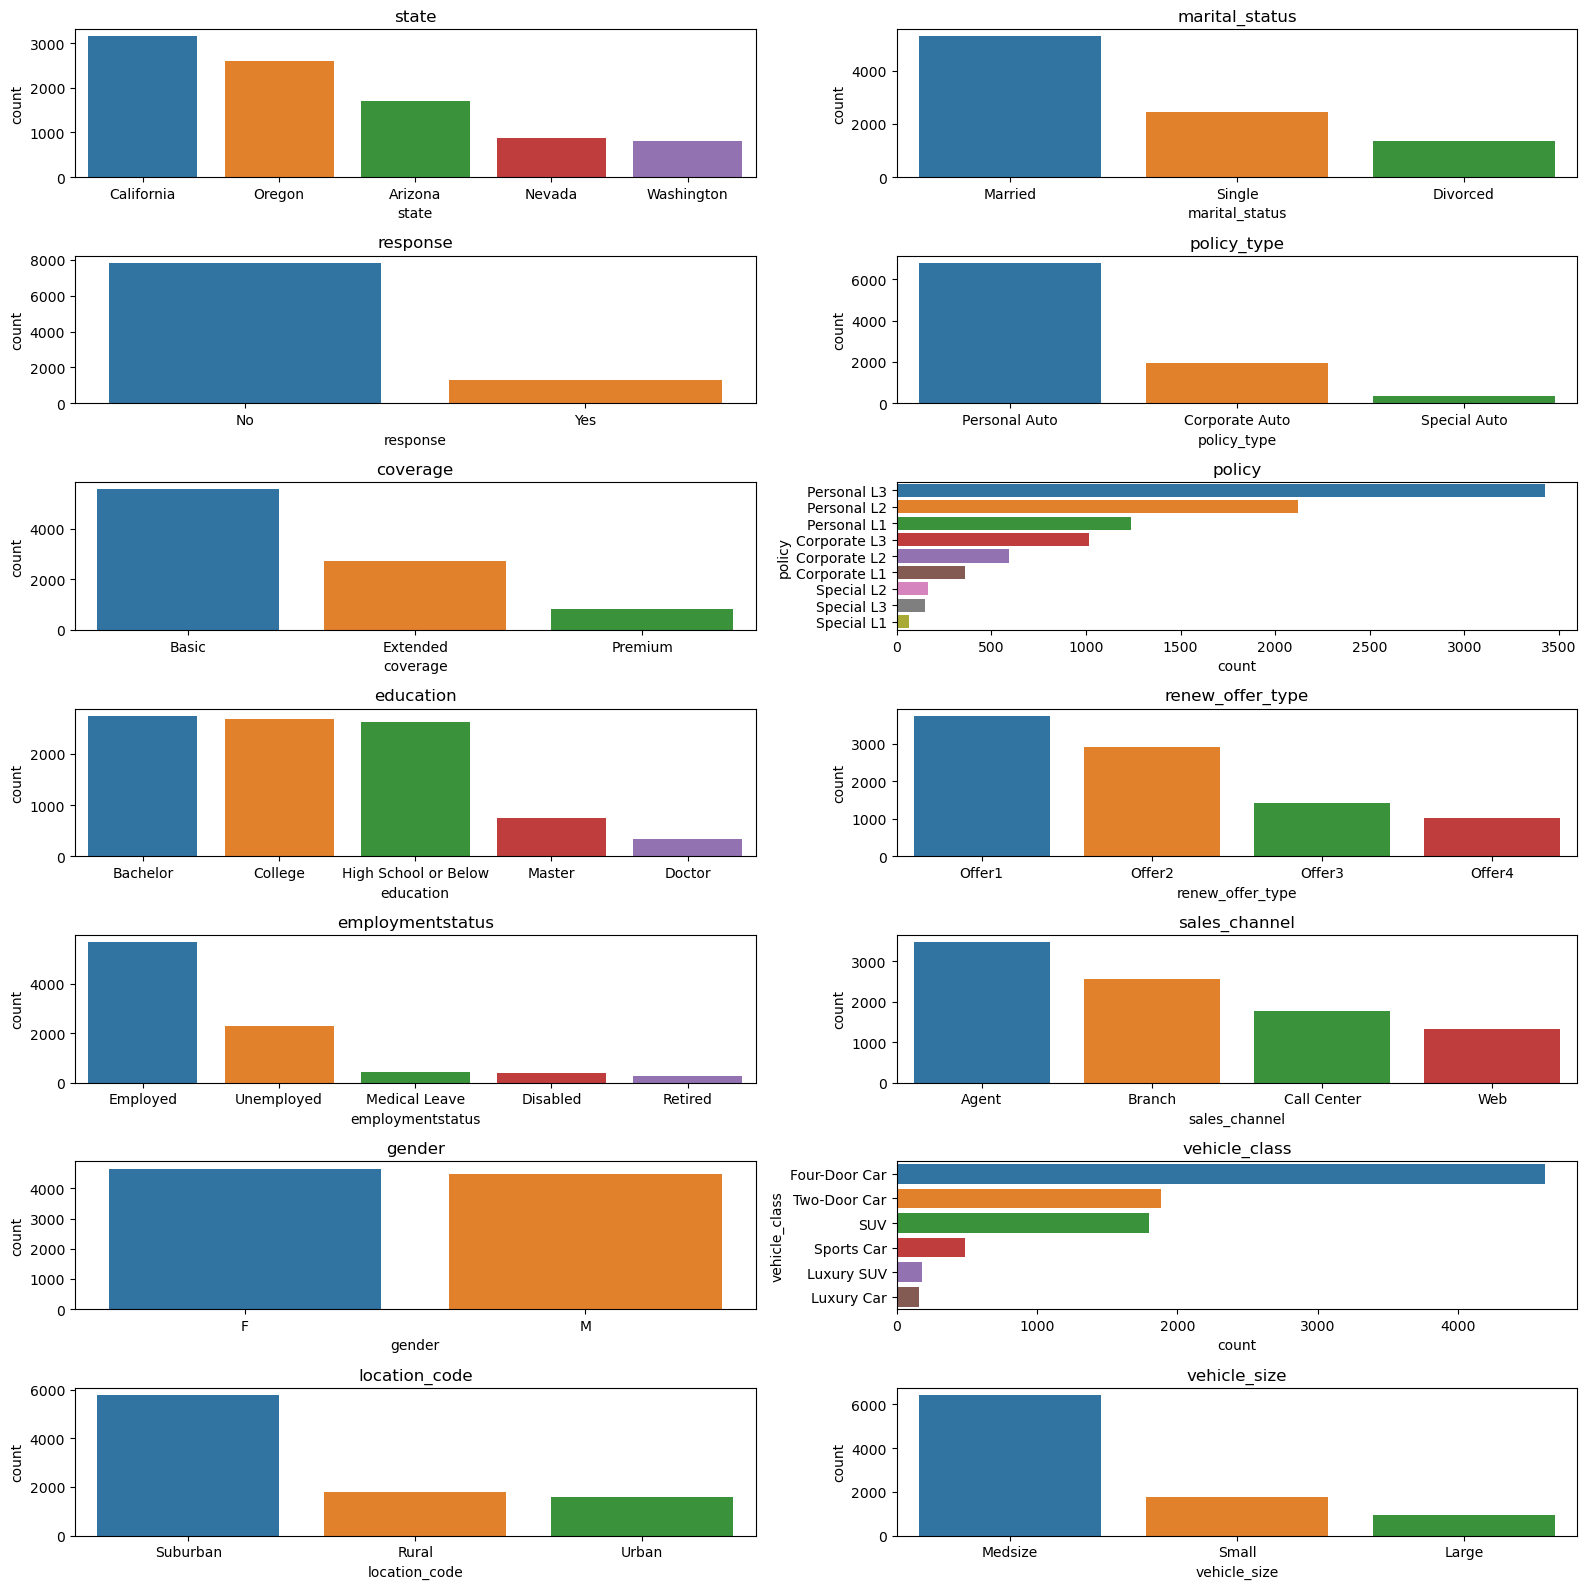

In [73]:
def countp(df,a,b):
    h=round(df.shape[1]/2+0.1)
    fig,ax=plt.subplots(h,2,figsize=(a,b))
    column_index = 0

    for c in range(2):
        for i in range(h):
            if df[df.columns[column_index]].value_counts().shape[0]<6:
                sx = sns.countplot(x=df[df.columns[column_index]], ax=ax[i,c],order=df[df.columns[column_index]].value_counts().index)
            else:
                sx = sns.countplot(y=df[df.columns[column_index]], ax=ax[i,c],order=df[df.columns[column_index]].value_counts().index)
            sx.set(title=df.columns[column_index])
            column_index += 1
            if column_index==df.shape[1]:
                break
    
    plt.tight_layout()
    plt.show()

countp(categorical_df,16,16)

policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.


In [74]:
categorical_df.drop('policy_type',axis=1,inplace=True)
categorical_df['policy']= categorical_df['policy'].apply(lambda x: x.replace(x,x[x.find(' L'):x.find(' L')+3]))
categorical_df['policy'].value_counts()

 L3    4588
 L2    2881
 L1    1665
Name: policy, dtype: int64

Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)


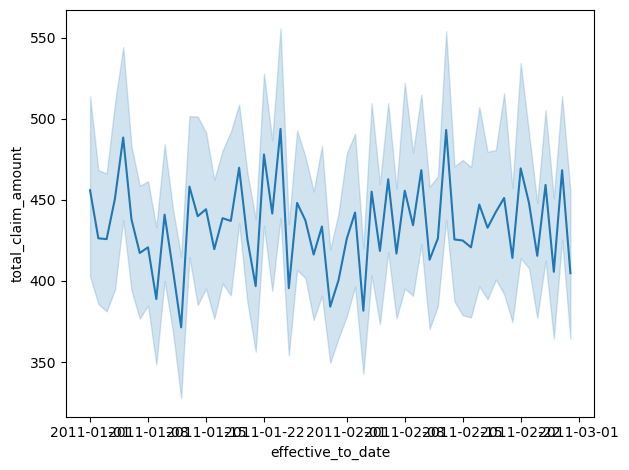

In [75]:
sns.lineplot(x=customer_df['effective_to_date'],y=customer_df['total_claim_amount'])
plt.tight_layout()
plt.show()

To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [76]:
t=customer_df['effective_to_date']
time_df=pd.DataFrame({'day':t.dt.day,'day_name':t.dt.day_name(),'week':t.dt.strftime('%V'),'month':t.dt.month_name(),'total_claim_amount':customer_df['total_claim_amount']})
time_df

,day,day_name,week,month,total_claim_amount
0,24,Thursday,08,February,384.811147
1,31,Monday,05,January,1131.464935
2,19,Saturday,07,February,566.472247
3,20,Thursday,03,January,529.881344
4,3,Thursday,05,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,06,February,198.234764
9130,12,Saturday,06,February,379.200000
9131,6,Sunday,05,February,790.784983
9132,3,Thursday,05,February,691.200000


Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [77]:
[dt.strftime(dt.fromordinal(i+1),'%A') for i in range(7)]

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [78]:
list_of_correct_days=[dt.strftime(dt.fromordinal(i+1),'%A') for i in range(7)]
by_day=round(time_df.groupby('day_name').agg({'total_claim_amount':sum}),2).reindex(index=list_of_correct_days).rename(columns={'total_claim_amount':'target'})
by_day

,target
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66



Use a seaborn line plot to plot the previous series.

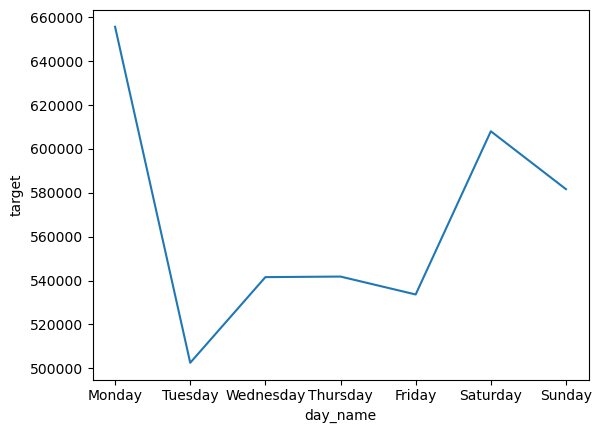

In [79]:
sns.lineplot(y=by_day['target'],x=by_day.index);

 Do you see some differences by day of the week?

Yes, there are far more claims on Monday or on the weekend than the rest of the days.

Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [80]:
claims_by_day=time_df.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_days)
claims_by_day

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()


In [81]:
med_by_day=round(time_df.groupby('day_name').agg({'total_claim_amount':np.median}),2).sort_values('total_claim_amount',ascending=False).rename(columns={'total_claim_amount':'target'})
med_by_day

,target
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


Plot the median "target" by day of the week name using a seaborn barplot

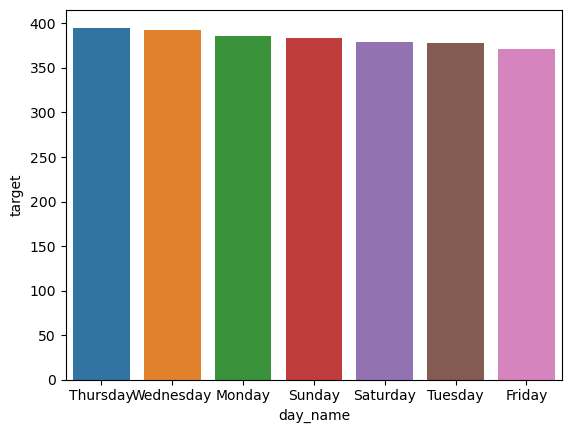

In [82]:
sns.barplot(y=med_by_day['target'],x=med_by_day.index);


What can you conclude from this analysis?

I can conclude that the even though the total the distribution of total claim amount is skewed between the days of the week, the distribution of total claim amount in every day of the week will be the same.

Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [83]:
list_of_correct_values=[dt.strftime(dt.fromordinal((i+1)*29),'%B') for i in range(2)]


Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [84]:


by_month=round(time_df.groupby('month').agg({'total_claim_amount':sum}),2).rename(columns={'total_claim_amount':'target'}).reindex(index=list_of_correct_values)
by_month

,target
month,
January,2117142.86
February,1847824.19


Can you do a monthly analysis given the output of the previous series? Why?

No, it is not possible to do a monthly analysis as there are not enough months to analyse

Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [85]:
continuous_df.describe().loc['std']

customer_lifetime_value           6870.967608
income                           30379.904734
monthly_premium_auto                34.407967
months_since_policy_inception       27.905991
total_claim_amount                 290.500092
Name: std, dtype: float64

In [86]:
def outl(df,thr=3):
    dp=[]
    std=df.describe().loc['std']
    avg=df.describe().loc['mean']
    for c in df.columns:
        for i in range(df.shape[0]):
            if df[c][i]<avg.loc[c]-thr*std.loc[c] or df[c][i]>avg.loc[c]+thr*std.loc[c]:
                dp.append(i)
    return df.drop(dp,axis=0)



Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [87]:
continuous_clean_df=outl(continuous_df)

Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [88]:
final_df=pd.concat([continuous_clean_df, discrete_df, categorical_df,time_df['day_name']],axis=1).dropna().reset_index(drop=True)

Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [89]:
final_df=final_df.reindex(columns=[i for i in final_df.columns if i!='total_claim_amount']+['total_claim_amount'])

In [90]:
final_df.columns[-1]

'total_claim_amount'

Turn the response column values into (Yes=1/No=0).

In [91]:
final_df['response']=final_df['response'].apply(lambda x: int(x=='Yes'))
final_df.response.value_counts()

0    7422
1    1248
Name: response, dtype: int64


Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [92]:
final_df['education']=final_df['education'].apply(lambda x: "Graduate" if x in ["Master","Doctor"] else x)
final_df['education'].value_counts()

Bachelor                2618
College                 2557
High School or Below    2466
Graduate                1029
Name: education, dtype: int64

Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [93]:
final_df['employmentstatus']=final_df['employmentstatus'].apply(lambda x: "Inactive" if x in ["Medical Leave", "Disabled", "Retired"] else x)
final_df['employmentstatus'].value_counts()

Employed      5418
Unemployed    2169
Inactive      1083
Name: employmentstatus, dtype: int64

Deal with column Gender turning the values into (1/0).

In [94]:
final_df['gender']=final_df['gender'].apply(lambda x: int(x=='M'))
final_df.gender.value_counts()

0    4426
1    4244
Name: gender, dtype: int64

Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [95]:
final_df['vehicle_class']=final_df['vehicle_class'].apply(lambda x: "Luxury" if x in ["Sports Car", "Luxury SUV", "Luxury Car"] else x)
final_df['vehicle_class'].value_counts()

Four-Door Car    4588
Two-Door Car     1871
SUV              1672
Luxury            539
Name: vehicle_class, dtype: int64

Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [96]:
def cov(x):
    if x =='Basic':
        return 1
    elif x=='Extended':
        return 2
    elif x=='Premium':
        return 3

final_df['coverage']=final_df['coverage'].apply(cov)

Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [97]:
def emp(x):
    if x =='Unemployed':
        return 1
    elif x=='Inactive':
        return 2
    elif x=='Employed':
        return 3

final_df['employmentstatus']=final_df['employmentstatus'].apply(emp)

Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [98]:
def loc(x):
    if x =='Rural':
        return 1
    elif x=='Suburban':
        return 2
    elif x=='Urban':
        return 3

final_df['location_code']=final_df['location_code'].apply(loc)

Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [99]:
def vsize(x):
    if x =='Small':
        return 1
    elif x=='Medsize':
        return 2
    elif x=='Large':
        return 3

final_df['vehicle_size']=final_df['vehicle_size'].apply(vsize)

In [100]:
final_df.select_dtypes('object')

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday
...,...,...,...,...,...,...,...,...
8665,California,Bachelor,Married,L1,Offer2,Web,Four-Door Car,Thursday
8666,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday
8667,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday
8668,California,College,Married,L2,Offer3,Branch,Four-Door Car,Thursday


Get a dataframe with the categorical nominal columns

In [101]:
categorical_nominal_df=final_df.select_dtypes('object')



Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]


In [102]:
levels=[[i for i in categorical_nominal_df[i].unique()] for i in categorical_nominal_df.columns]

Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [124]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first',categories=levels).fit(categorical_nominal_df)
encoded=encoder.transform(categorical_nominal_df)
encoded_df=pd.DataFrame(data=encoded.toarray(),columns=encoder.get_feature_names_out())

encoded_df



,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_ L2,...,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8668,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
